# Investigacion Corta 2      

# PRE-PROCESADO

## 21JUN2021

## Curso: TEC-BSC Reconocimiento de Patrones

### Profesor: Msc. Felipe Meza

### Alumno: Oscar Castro

https://archive.ics.uci.edu/ml/datasets/balloons

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline



In [5]:
import pandas as pd

In [6]:
import seaborn as sns

https://archive.ics.uci.edu/ml/datasets/Balloons

In [7]:
balloons = pd.read_csv("https://raw.githubusercontent.com/ocastroq/TEC_BSC_Reconocimiento_de_Patrones/main/adult%2Bstretch.data")

In [8]:
balloons.head()

,YELLOW,SMALL,STRETCH,ADULT,T
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,?
2,YELLOW,SMALL,DIP,ADULT,F
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,LARGE,STRETCH,ADULT,T


### Agregar nombres de columnas

In [9]:
column_names = ['Color','Size','Act','Age','Inflated']

In [10]:
balloons = pd.read_csv("https://raw.githubusercontent.com/ocastroq/TEC_BSC_Reconocimiento_de_Patrones/main/adult%2Bstretch.data", names=column_names)

In [11]:
balloons.head()

,Color,Size,Act,Age,Inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,ADULT,T
2,YELLOW,SMALL,STRETCH,CHILD,?
3,YELLOW,SMALL,DIP,ADULT,F
4,YELLOW,SMALL,DIP,CHILD,F


In [12]:
balloons

,Color,Size,Act,Age,Inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,ADULT,T
2,YELLOW,SMALL,STRETCH,CHILD,?
3,YELLOW,SMALL,DIP,ADULT,F
4,YELLOW,SMALL,DIP,CHILD,F
5,YELLOW,LARGE,STRETCH,ADULT,T
6,YELLOW,LARGE,STRETCH,ADULT,T
7,YELLOW,LARGE,STRETCH,CHILD,F
8,YELLOW,LARGE,DIP,ADULT,F
9,YELLOW,LARGE,DIP,CHILD,F


### Proximamente se aplicara la normalizacion de los datos para los cuales se aplica lo siguiente:
Columna de Color: YELLOW = 0 / PURPLE = 1
Columna de Size: SMALL = 0 / LARGE = 1
Columna de Act: STRETCH = 0 / DIP = 1
Columna de Age: CHILD = 0 / ADULT = 1
Columna de INFLATED: F = 0 / T = 1

In [13]:
balloons.replace(to_replace='YELLOW',value=0,inplace=True)
balloons.replace(to_replace='PURPLE',value=1,inplace=True)
balloons.replace(to_replace='SMALL',value=0,inplace=True)
balloons.replace(to_replace='LARGE',value=1,inplace=True)
balloons.replace(to_replace='DIP',value=0,inplace=True)
balloons.replace(to_replace='STRETCH',value=1,inplace=True)
balloons.replace(to_replace='CHILD',value=0,inplace=True)
balloons.replace(to_replace='ADULT',value=1,inplace=True)
balloons.replace(to_replace='F',value=0,inplace=True)
balloons.replace(to_replace='T',value=1,inplace=True)


In [14]:
balloons

,Color,Size,Act,Age,Inflated
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,0,?
3,0,0,0,1,0
4,0,0,0,0,0
5,0,1,1,1,1
6,0,1,1,1,1
7,0,1,1,0,0
8,0,1,0,1,0
9,0,1,0,0,0


### Posterior a la normalizacion de los datos se observa que hay valores faltantes en la columna INFLATED por lo que se procede a aplicar las siguientes condicionales para determinar el valor, ya sea T (True) o F (False) segun los datos de entrada de las columnas anteriores:

Inflated is true if color=blue(1), size=purple(1), age=adult(1) and act=stretch(1)

Para esto, primeramente se van a reemplazar los datos con signo de pregunta (?) por un valor en numpy de nan para poder hacer las sustituciones con base en los valores de las otras columnas. 


In [15]:
balloons.replace(to_replace='?',value = np.nan,inplace=True)

In [16]:
balloons

,Color,Size,Act,Age,Inflated
0,0,0,1,1,1.0
1,0,0,1,1,1.0
2,0,0,1,0,NaN
3,0,0,0,1,0.0
4,0,0,0,0,0.0
5,0,1,1,1,1.0
6,0,1,1,1,1.0
7,0,1,1,0,0.0
8,0,1,0,1,0.0
9,0,1,0,0,0.0


In [17]:
balloons.fillna(balloons.mean(), inplace = True)

In [18]:
balloons

,Color,Size,Act,Age,Inflated
0,0,0,1,1,1.000000
1,0,0,1,1,1.000000
2,0,0,1,0,0.411765
3,0,0,0,1,0.000000
4,0,0,0,0,0.000000
5,0,1,1,1,1.000000
6,0,1,1,1,1.000000
7,0,1,1,0,0.000000
8,0,1,0,1,0.000000
9,0,1,0,0,0.000000


In [19]:
balloons=balloons.round()

In [20]:
balloons

,Color,Size,Act,Age,Inflated
0,0,0,1,1,1.0
1,0,0,1,1,1.0
2,0,0,1,0,0.0
3,0,0,0,1,0.0
4,0,0,0,0,0.0
5,0,1,1,1,1.0
6,0,1,1,1,1.0
7,0,1,1,0,0.0
8,0,1,0,1,0.0
9,0,1,0,0,0.0


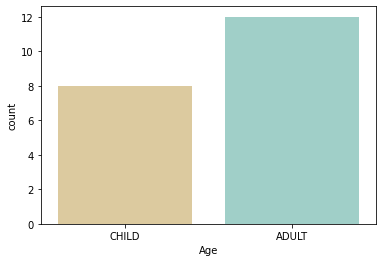

In [21]:
plt.figure()
sns.countplot(x='Age', data=balloons,palette='BrBG')
plt.xticks([0,1],['CHILD','ADULT'])
plt.show()

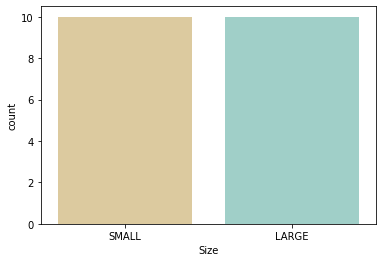

In [22]:
plt.figure()
sns.countplot(x='Size', data=balloons,palette='BrBG')
plt.xticks([0,1],['SMALL','LARGE'])
plt.show()

### A continuacion otro set de datos con el fin de realizar la tecnica de deteccion/eliminacion de outliers

https://archive.ics.uci.edu/ml/datasets/Container+Crane+Controller+Data+Set

In [33]:
controller = pd.read_csv ("https://raw.githubusercontent.com/ocastroq/TEC_BSC_Reconocimiento_de_Patrones/main/Container_Crane_Controller_Data_Set.csv")

In [34]:
controller

,1,-5,0.3
0,2,5,0.3
1,3,-2,0.5
2,1,2,0.5
3,2,100,0.7
4,6,-5,0.5
5,7,5,0.5
6,6,-2,0.3
7,7,2,58.0
8,6,0,0.7
9,8,-5,0.5


In [35]:
column_names = ['Speed','Angle','Power']

In [36]:
controller = pd.read_csv("https://raw.githubusercontent.com/ocastroq/TEC_BSC_Reconocimiento_de_Patrones/main/Container_Crane_Controller_Data_Set.csv", names=column_names)

In [37]:
controller

,Speed,Angle,Power
0,1,-5,0.3
1,2,5,0.3
2,3,-2,0.5
3,1,2,0.5
4,2,100,0.7
5,6,-5,0.5
6,7,5,0.5
7,6,-2,0.3
8,7,2,58.0
9,6,0,0.7


In [40]:
from statistics import mean, median

Se muestra la media de la columna "Angle" de la siguiente manera:

In [55]:
controller['Angle'].mean()

8.636363636363637

Posteriormente se muestra la mediana de la columna "Angle" de la siguiente manera:

In [56]:
controller['Angle'].median()

0.0

Con este ejercicio se aprecia que con el valor de la media cuando se tiene un outlier real, se aleja mucho del valor que tuviese si se eliminara el outlier mientras que utilizando la mediana, aun con el valor del outlier, no se aleja tanto de la media sin el outlier